In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

seed_value = 42
np.random.seed(seed_value)

In [ ]:
import os
data_path = os.path.join("..","..", "Data", "processed_data/NTPC.csv")
df = pd.read_csv(data_path)
print(df.head())

         Date  Prev Close   Open   High    Low   Last  Close   VWAP  \
0  2004-11-05       62.00  88.00  88.00  70.00  75.55  75.55  73.12   
1  2004-11-08       75.55  76.80  78.60  75.00  75.15  75.20  76.88   
2  2004-11-09       75.20  75.10  76.10  74.55  75.25  75.30  75.28   
3  2004-11-10       75.30  75.50  75.95  75.00  75.05  75.05  75.32   
4  2004-11-11       75.05  75.35  75.40  74.30  74.60  74.45  74.74   

      Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  232535736  1.700363e+15     NaN           115350904       0.4961  
1   68865277  5.294024e+14     NaN            25571231       0.3713  
2   37460886  2.820236e+14     NaN            13585363       0.3627  
3   17413433  1.311585e+14     NaN             7039001       0.4042  
4   15961426  1.193037e+14     NaN             7286922       0.4565  


In [5]:
ts = df['Close']

In [7]:
pip install statsmodels


  Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp310-cp310-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -2.2941655779627754
p-value: 0.1738565940952463


In [ ]:
ts_diff = ts.diff().dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -13.919995295963776
p-value: 5.317141287900575e-26


In [ ]:
train_size = int(len(ts_diff) * 0.9)
train, test = ts_diff[:train_size], ts_diff[train_size:]


MSE: 0.8279
RMSE: 0.9099
MAE: 0.6929
R2: -0.0120
MedAE: 0.4442


c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_

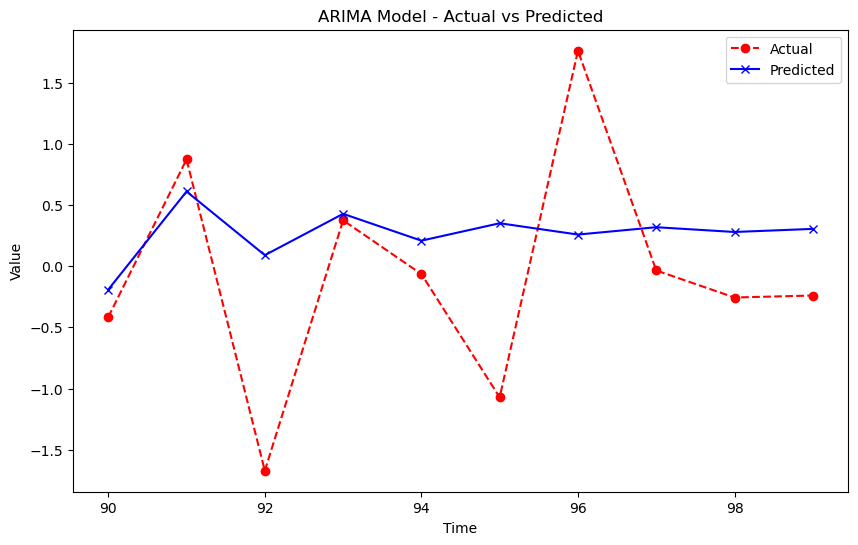

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
ts = pd.Series(np.random.randn(100))
ts_diff = ts.diff().dropna()
train_size = int(len(ts_diff) * 0.9)
train, test = ts_diff[:train_size], ts_diff[train_size:]

# Fit ARIMA model (example with p=1, d=1, q=0)
model = ARIMA(train, order=(1, 1, 0))
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, y_pred)
r2 = r2_score(test, y_pred)
medae = median_absolute_error(test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")
print(f"MedAE: {medae:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='red', linestyle='--', marker='o')
plt.plot(test.index, y_pred, label='Predicted', color='blue', linestyle='-', marker='x')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


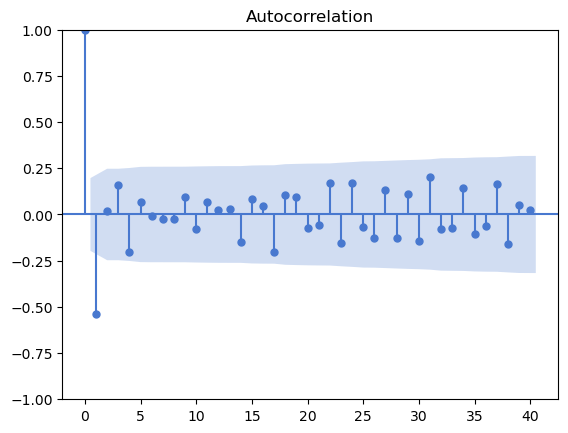

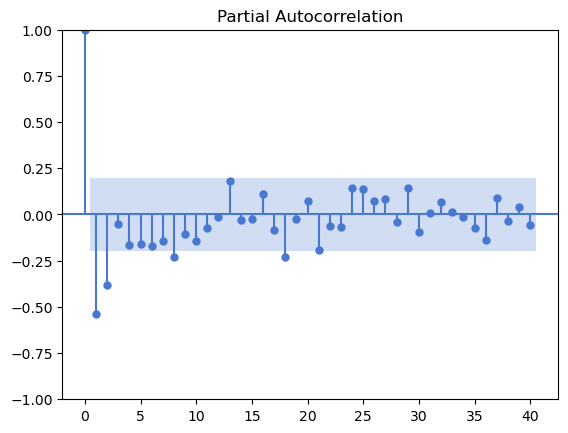

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_diff, lags=40)    # for q
plot_pacf(ts_diff, lags=40)   # for p
plt.show()

c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\statespac

MSE: 2.9899
RMSE: 1.7291
MAE: 1.4357
R2: -0.4594
MedAE: 1.3948


c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


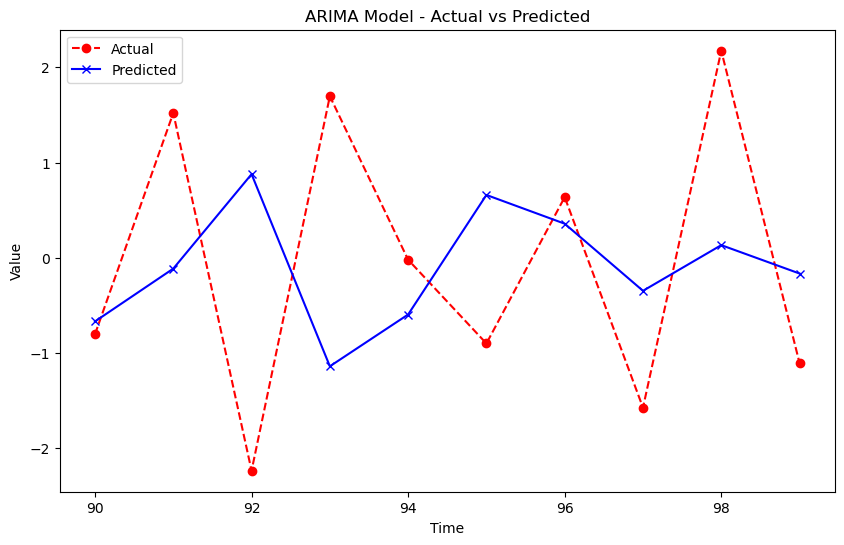

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
ts = pd.Series(np.random.randn(100))
ts_diff = ts.diff().dropna()
train_size = int(len(ts_diff) * 0.9)
train, test = ts_diff[:train_size], ts_diff[train_size:]

# Fit ARIMA model (example with p=1, d=1, q=0)
model = ARIMA(train, order=(11, 1, 11))
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, y_pred)
r2 = r2_score(test, y_pred)
medae = median_absolute_error(test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")
print(f"MedAE: {medae:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='red', linestyle='--', marker='o')
plt.plot(test.index, y_pred, label='Predicted', color='blue', linestyle='-', marker='x')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MSE: 2.5411
RMSE: 1.5941
MAE: 1.4732
R2: -0.4492
MedAE: 1.5522


c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\SASWATA GHOSH\.conda\envs\clean_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


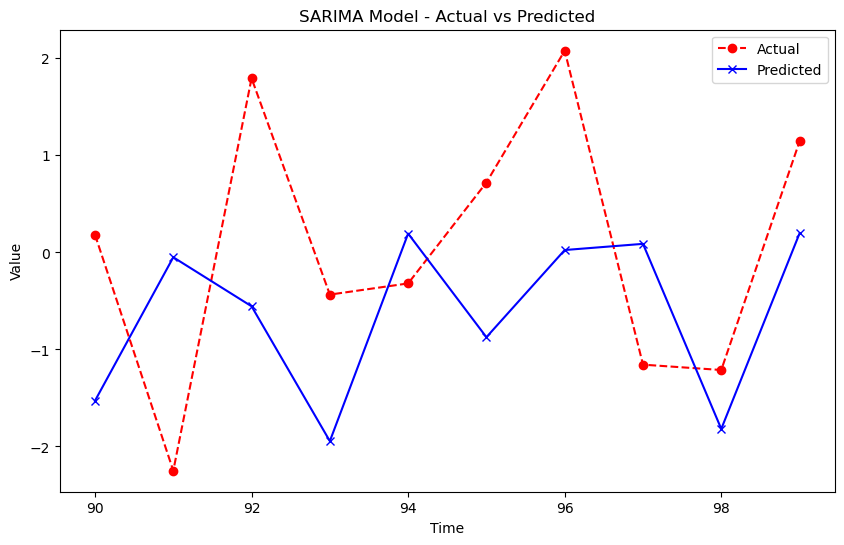

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
ts = pd.Series(np.random.randn(100))
ts_diff = ts.diff().dropna()
train_size = int(len(ts_diff) * 0.9)
train, test = ts_diff[:train_size], ts_diff[train_size:]
model = SARIMAX(train, order=(1, 1, 0), seasonal_order=(12, 1, 0, 12))
model_fit = model.fit()
y_pred = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, y_pred)
r2 = r2_score(test, y_pred)
medae = median_absolute_error(test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")
print(f"MedAE: {medae:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='red', linestyle='--', marker='o')
plt.plot(test.index, y_pred, label='Predicted', color='blue', linestyle='-', marker='x')
plt.title('SARIMA Model - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
